In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
diabetes_data=pd.read_csv('diabetes.csv') #데이터 불러오기
print(diabetes_data['Outcome'].value_counts()) #데이터 값 확인
diabetes_data.head(3) #3개 불러오기

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [108]:
#feature 타입과 Nyll 갯수
diabetes_data.info()
#null 값 없고 인코딩도 필요 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [133]:
#피터 데이터 세트 x, 레이블 데이터 세트 y를 추출
#맨끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X=diabetes_data.iloc[:,:-1] #마지막 열 뺴고 모두 선택
y=diabetes_data.iloc[:,-1] #마지막 열만 선택
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

def get_clf_eval(y_test, Pred=None, pred_proba_c1=None):
    confusion=confusion_matrix(y_test, Pred)
    accuracy=accuracy_score(y_test, Pred)
    precision=precision_score(y_test, Pred)
    recall=recall_score(y_test,Pred)
    f1=f1_score(y_test,Pred)
    roc_auc=roc_auc_score(y_test,pred_proba_c1)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, Auc:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

#로지스틱 회귀로 학습, 예측 및 형가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)


오차행렬
[[88 12]
 [22 32]]
정확도:0.7792, 정밀도:0.7273, 재현율:0.5926, F1:0.6531, Auc:0.8437


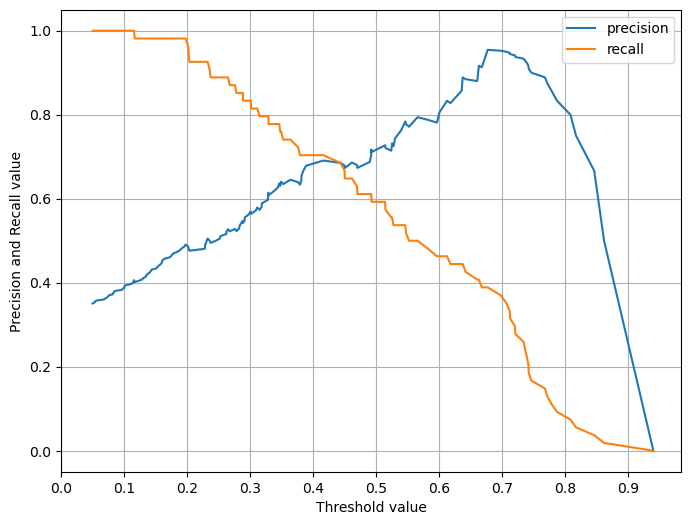

In [134]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle="-", label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, pred_proba_c1)

In [111]:
#정밀도와 재현율 모두 양쪽이 균형을 이루는 부근에서 0.7보다 낮은 값을 보임.
#다시 분류 결정 임곗값을 새롭게 정하기 전에 분포를 확인
diabetes_data.describe()
#최솟값이 0인 값이 너무 많음.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


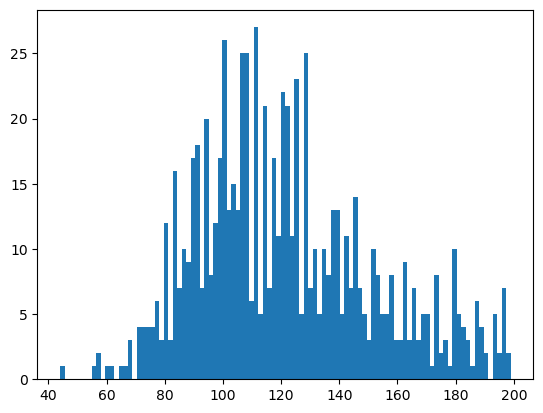

In [135]:
plt.hist(diabetes_data['Glucose'],bins=100) #bins() :()개의 구간으로 나누어 막대 그래프 표시
plt.show()

In [136]:
#min()값이 0인 피처에 대해 0의 건수와 전체 데이터에서 몇퍼센트 차지하는지 확인
diabetes_data.columns
#0값을 검사할 피처명 리스트
zero_features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
#전체 데이터 건수
total_count=diabetes_data['Glucose'].count()
#피처별로 반복하면서 데이터 값인 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_total=diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_total,100*zero_total/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00%
BloodPressure 0 건수는 0, 퍼센트는 0.00%
SkinThickness 0 건수는 0, 퍼센트는 0.00%
Insulin 0 건수는 0, 퍼센트는 0.00%
BMI 0 건수는 0, 퍼센트는 0.00%


In [137]:
#SkinThickness와 Insulin의 경우 퍼센트가 높음. 하지만 전체 데이터 건수가 작아 이들을 모두 삭제할 순 없음.
#0을 평균값으로 대체함.
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

In [138]:
X=diabetes_data.iloc[:,:-1] 
y=diabetes_data.iloc[:,-1] 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 회귀로 학습, 예측 및 형가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

#여전히 재현율이 낮게 나옴.

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1:0.6804, Auc:0.8433


In [140]:
#임곗값을 임의로 다르게 하여 재현율과 다른 평가 지표 관찰
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임곗값: ', custom_threshold)
        get_clf_eval(y_test,custom_predict,custom_predict)
    
thresholds=[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba_c1=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba_c1[:,1].reshape(-1,1),thresholds)

임곗값:  0.3
오차행렬
[[65 35]
 [11 43]]
정확도:0.7013, 정밀도:0.5513, 재현율:0.7963, F1:0.6515, Auc:0.7231
임곗값:  0.33
오차행렬
[[71 29]
 [11 43]]
정확도:0.7403, 정밀도:0.5972, 재현율:0.7963, F1:0.6825, Auc:0.7531
임곗값:  0.36
오차행렬
[[76 24]
 [15 39]]
정확도:0.7468, 정밀도:0.6190, 재현율:0.7222, F1:0.6667, Auc:0.7411
임곗값:  0.39
오차행렬
[[78 22]
 [16 38]]
정확도:0.7532, 정밀도:0.6333, 재현율:0.7037, F1:0.6667, Auc:0.7419
임곗값:  0.42
오차행렬
[[84 16]
 [18 36]]
정확도:0.7792, 정밀도:0.6923, 재현율:0.6667, F1:0.6792, Auc:0.7533
임곗값:  0.45
오차행렬
[[85 15]
 [18 36]]
정확도:0.7857, 정밀도:0.7059, 재현율:0.6667, F1:0.6857, Auc:0.7583
임곗값:  0.48
오차행렬
[[88 12]
 [19 35]]
정확도:0.7987, 정밀도:0.7447, 재현율:0.6481, F1:0.6931, Auc:0.7641
임곗값:  0.5
오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1:0.6804, Auc:0.7556


In [122]:
binarizer=Binarizer(threshold=0.48)
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차행렬
[[88 12]
 [19 35]]
정확도:0.7987, 정밀도:0.7447, 재현율:0.6481, F1:0.6931, Auc:0.8433
